<a href="https://colab.research.google.com/github/LeeSeungwon89/Deep-learning_Theory/blob/main/8-3%20%ED%95%A9%EC%84%B1%EA%B3%B1%20%EC%8B%A0%EA%B2%BD%EB%A7%9D%EC%9D%98%20%EC%8B%9C%EA%B0%81%ED%99%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **8-3 합성곱 신경망의 시각화**

신경망이 이미지에서 어떤 것을 학습하는지 합성곱 층의 가중치와 특성 맵을 시각화하여 통해 확인해 보겠습니다.

## **가중치 시각화**

합성곱 층은 여러 필터를 사용하여 이미지에서 특징을 학습합니다. 각 필터는 커널이라 부르는 가중치와 절편을 가집니다. 절편은 시각적인 의미를 갖진 않지만 가중치는 입력 이미지의 2차원 영역에 적용되어 어떤 특징을 두드러지게 표현하는 역할을 가집니다. 예컨대 특정 필터가 이미지의 둥근 모서리에 도장을 찍었다면 어떤 특정 가중치는 둥근 모서리가 있는 영역에서는 크게 활성화되어 높은 값을 만들고 그렇지 않은 영역에서는 활성화되지 않은 낮은 값을 만듭니다. 이 높은 값을 토대로 둥근 모서리가 있는 입력과 곱해지면 큰 출력을 만듭니다.

이전 챕터에서 학습한 가중치를 확인하기 위해 체크포인트 파일을 읽어 보겠습니다. 먼저 저자의 깃허브에 저장된 `best-cnn-model.h5` 파일을 다운로드하겠습니다. 8-2 챕터에서 생성했던 코드를 가져와도 무관합니다.

In [18]:
!wget https://github.com/rickiepark/hg-mldl/raw/master/best-cnn-model.h5

--2022-09-14 08:24:53--  https://github.com/rickiepark/hg-mldl/raw/master/best-cnn-model.h5
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/best-cnn-model.h5 [following]
--2022-09-14 08:24:53--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/best-cnn-model.h5
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4049416 (3.9M) [application/octet-stream]
Saving to: ‘best-cnn-model.h5.1’

best-cnn-model.h5.1 100%[===================>]   3.86M  --.-KB/s    in 0.07s   

2022-09-14 08:24:54 (56.2 MB/s) - ‘best-cnn-model.h5.1’ saved [4049416/4049416]



체크포인트 파일을 읽어 보겠습니다.

In [19]:
from tensorflow import keras

model = keras.models.load_model('best-cnn-model.h5')

모델에 추가한 층을 확인해 보겠습니다. 모델의 `layers` 속성에 리스트 형식으로 저장되어 있습니다.

In [20]:
model.layers

먼저 처음 합성곱 층의 가중치를 확인하겠습니다. 가중치와 절편은 각 층의 `weights` 속성에 리스트 형식으로 저장되어 있습니다.

In [21]:
conv = model.layers[0]
# `weights[0]`은 가중치, `weights[1]`은 절편입니다.
print(conv.weights[0])
print(conv.weights[1])

<tf.Variable 'conv2d/kernel:0' shape=(3, 3, 1, 32) dtype=float32, numpy=
array([[[[ 2.24588048e-02,  5.65292537e-02, -8.52608621e-01,
           5.51108969e-03, -2.84124047e-01,  5.49770594e-02,
           1.42099485e-01, -1.35188410e-02, -5.56270957e-01,
          -1.61427796e-01, -1.63072810e-01,  7.48860016e-02,
          -1.97094038e-01,  3.74589069e-03,  1.17388563e-02,
           3.49008739e-01, -5.60458899e-01,  2.95836627e-01,
           6.69615567e-02, -7.12780356e-02,  4.99922745e-02,
           1.06703136e-02, -4.98783104e-02,  3.04090921e-02,
          -3.88760604e-02, -1.53872028e-01,  1.51755556e-01,
          -2.00085923e-01,  8.52966532e-02, -6.73547685e-02,
           8.74601901e-02, -2.06523493e-01]],

        [[ 1.73668079e-02,  2.76921540e-01,  1.56758521e-02,
          -1.38880894e-01,  2.31679767e-01,  1.31663650e-01,
          -6.39315844e-02,  4.06329334e-02, -5.02456963e-01,
           1.28005192e-01,  2.44174451e-01, -1.98248819e-01,
           2.77268946e-01,

커널 크기는 (3, 3)이고 입력 깊이는 1이므로 실제 커널 크기는 (3, 3, 1)이며, 필터 개수는 32개이므로 (3, 3, 1, 32)입니다. 아울러 필터 개수에 따라 절편은 32개이므로 (32,)입니다.

속성 `weights`를 다루기 쉽도록 넘파이 배열로 변환하고 가중치의 평균과 표준편차를 산출하고 추후에 훈련 전의 가중치와 비교하겠습니다.

In [22]:
conv_weights = conv.weights[0].numpy()
print(conv_weights.mean(), conv_weights.std())

-0.021033935 0.23466988


가중치의 분포를 확인하기 위해 히스토그램을 그려 보겠습니다.

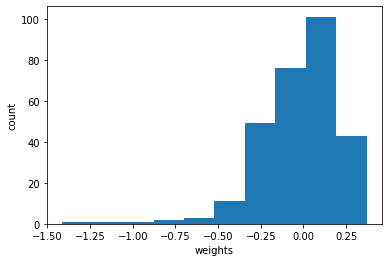

In [23]:
import matplotlib.pyplot as plt

plt.hist(conv_weights.reshape(-1, 1))
plt.xlabel('weights')
plt.ylabel('count')
plt.show()

종 모양 형태를 띕니다. 가중치가 무엇을 학습했는지 추후에 훈련 전의 가중치와 비교해 보겠습니다.

커널 32개를 16개씩 두 줄로 나타내 보겠습니다. 커널 32개는 가중치 32개와 같은 의미입니다.

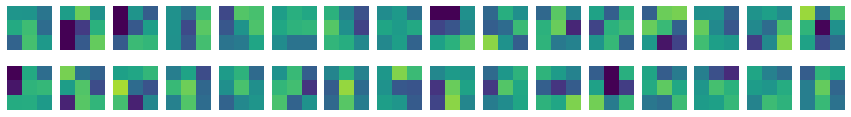

In [24]:
fig, axs = plt.subplots(2, 16, figsize=(15, 2))
for i in range(2):
    for j in range(16):
        axs[i, j].imshow(conv_weights[:, :, 0, i*16 + j], vmin=-0.5, vmax=0.5)
        axs[i, j].axis('off')
plt.show()

`imshow()` 메서드는 배열이 가진 최댓값과 최솟값을 사용하여 픽셀 강도를 표현합니다. 0.1이든 0.4든 어떤 값이든 최댓값이면 가장 밝은 노란색으로 나타냅니다. 어떤 절댓값을 기준으로 삼아 픽셀 강도를 나타내면 비교하기 좋기 때문에 두 배열을 이 메서드로 비교하는 것은 옳지 않습니다. 따라서 매개변수 `vmin`과 `vmax`를 지정하여 컬러맵으로 표현할 범위를 지정했습니다.

훈련한 가중치와 훈련하지 않은 가중치를 비교하기 위해 훈련하지 않은 빈 합성곱 신경망을 생성하고 시각화하여 비교해 보겠습니다. 

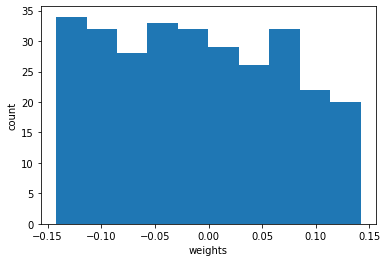

In [25]:
no_training_model = keras.Sequential()
no_training_model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu',
                                          padding='same', input_shape=(28, 28, 1)))

no_training_conv = no_training_model.layers[0]

no_training_weights = no_training_conv.weights[0].numpy()

plt.hist(no_training_weights.reshape(-1, 1))
plt.xlabel('weights')
plt.ylabel('count')
plt.show()

텐서플로는 신경망의 가중치를 처음 초기화할 때 균등 분포에서 무작위로 값을 선택합니다. 따라서 훈련하지 않은 가중치는 -0.15 ~ 0.15에 고르게 분포되어 있습니다.

이 가중치를 위에서 그림으로 출력한 방식처럼 출력하여 비교해 보겠습니다.

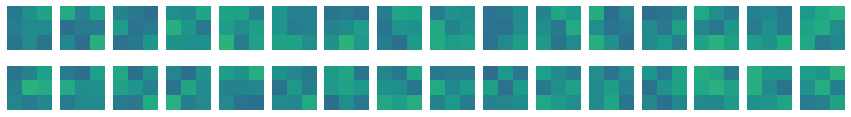

In [26]:
fig, axs = plt.subplots(2, 16, figsize=(15, 2))
for i in range(2):
    for j in range(16):
        axs[i, j].imshow(no_training_weights[:, :, 0, i*16 + j], vmin=-0.5, vmax=0.5)
        axs[i, j].axis('off')
plt.show()

훈련한 가중치와 달리 색 전체가 비슷한 색이거나 별다른 특징이 없습니다. 합성곱 신경망이 분류 정확도를 제고하기 위해 일련의 패턴을 학습했다는 사실을 추론할 수 있습니다.

## **함수형 API**

딥러닝에서는 이전까지 생성했던 모델보다 훨씬 더 복잡한 모델이 많습니다. 예컨대 입력이 2개거나 출력이 2개인 경우도 있습니다. 이런 경우는 `Sequential` 클래스를 사용하여 모델을 생성하기 어렵습니다. **함수형 API(functional API)**를 사용하여 모델을 생성해야 합니다. 함수형 API는 케라스의 `Model` 클래스로 모델을 생성합니다. 이전에 생성했던 완전 연결 신경망(밀집층 2개)을 구현해 보겠습니다(코드를 실행하지는 않겠습니다).

In [ ]:
dense1 = keras.layers.Dense(100, activation='sigmoid')
dense2 = keras.layers.Dense(10, activation='softmax')

이 과정까지는 같습니다. 이 인스턴스를 `Sequential` 클래스 인스턴스의 `add()` 메서드에 전달했었습니다. 다음 과정부터는 조금 다릅니다. `dense1` 인스턴스를 함수처럼 호출할 수 있습니다. 케라스의 층은 인스턴스를 함수처럼 호출했을 때 동작할 수 있도록 준비되어 있습니다. 

In [ ]:
# `inputs`는 입력값입니다.
hidden = dense1(inputs)

이 코드를 실행하면 `inputs`를 밀집층에 통과시키고 출력값 `hidden`을 생성합니다.

두 번째 층을 호출해 보겠습니다. 처음 층의 출력을 입력으로 사용하면 됩니다.

In [ ]:
outputs = dense2(hidden)

이 두 과정과 `Model` 클래스에 입력과 최종 출력을 지정하는 과정을 연달아 나열해 보겠습니다. 참고로 `Model` 클래스의 매개변수는 아래와 같습니다.

- `inputs`: 첫 번째 매개변수이며 모델의 입력 또는 입력의 리스트입니다.

- `outputs`: 두 번째 매개변수이며 모델의 출력 또는 출력의 리스트입니다.

- `name`: 모델의 이름입니다.

In [ ]:
hidden = dense1(inputs)
outputs = dense2(hidden)
model = keras.Model(inputs, outputs)

입력값인 `inputs`에 대해 알아보겠습니다. 이전 챕터에서 `plot_model()` 메서드로 모델 층을 도식화할 때 `InputLayer` 클래스가 맨 처음 나왔었습니다. `Sequential` 클래스는 이 `InputLayer` 클래스를 자동으로 추가하고 호출합니다. 반면 `Model` 클래스를 사용할 때는 `InputLayer` 클래스를 수동으로 생성해서 호출해야 합니다. 즉, 입력값인 `inputs`는 `InputLayer` 클래스의 출력값이 되어야 합니다.

참고로 `Sequential` 클래스 인스턴스에서 `InputLayer` 클래스 인스턴스가 저장된 위치는 `Sequential` 클래스 인스턴스의 속성인 `_layers`의 첫 번째 항목입니다. `InputLayer` 클래스는 신경망의 입력층 역할을 합니다. 모델의 입력을 처음 은닉층에 전달하는 역할인 것입니다. 따라서 `InputLayer` 클래스 인스턴스의 입력과 출력은 같습니다.

케라스는 `InputLayer` 클래스 인스턴스를 다루기 쉽도록 `Input()` 메서드(소문자가 아닌 대문자 I로 시작함)를 가집니다. 아래처럼 호출하면 클래스 인스턴스를 생성하여 출력을 반환합니다.

In [ ]:
inputs = keras.Input(shape=(784,))

입력값이 생성되었습니다. 전체 과정은 아래처럼 정리됩니다.

In [ ]:
inputs = keras.Input(shape=(784,))
hidden = dense1(inputs)
outputs = dense2(hidden)
model = keras.Model(inputs, outputs)

입력에서 출력까지 연결하고 마지막에 `Model` 클래스에 입력과 출력을 지정하여 모델을 생성하는 과정입니다. 이런 방식으로 모델을 생성하면 여러 형태의 층을 추가하여 연결할 수 있습니다. 

특성 맵 시각화를 생성하는 데 함수형 API가 필요한 이유는 아래 과정에서 알 수 있습니다. 이전 챕터에서 정의한 `model` 인스턴스의 층은 아래 순서로 구성됩니다.

`InputLayer` -> `Conv2D` ->(활성화 출력) `Maxpooling2D` -> `Conv2D` -> `Maxpooling2D` -> `Flatten` -> `Dense` -> `Dropout` -> `Dense`

여기서 필요한 것은 처음 `Conv2D`의 활성화 출력입니다. `model` 인스턴스의 입력과 `Conv2D`의 출력을 알 수 있다면 이 둘을 연결하여 새 모델을 얻을 수 있습니다.

`InputLayer` ->(입력값인 `model.input`이 전달됨) `Conv2D` ->(출력값인 `model.layers[0].output`이 전달됨) `Maxpooling2D` -> `Conv2D` -> `Maxpooling2D` -> `Flatten` -> `Dense` -> `Dropout` -> `Dense`

`model` 인스턴스의 `predict()` 메서드를 호출하면 입력부터 마지막 층까지 모든 계산을 수행하고 최종 출력을 반환합니다. 그러나 여기에서 필요한 것은 처음 `Conv2D` 층이 출력한 특성 맵입니다. 처음 층의 출력은 `Conv2D` 인스턴스의 `output` 속성에서 확인할 수 있습니다(`model.layers[0].output`). `model` 인스턴스의 입력은 아래처럼 확인할 수 있습니다.

In [27]:
print(model.input)

KerasTensor(type_spec=TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name='conv2d_input'), name='conv2d_input', description="created by layer 'conv2d_input'")


이제 아래처럼 `model_input`과 `model.layers[0].output`을 연결하는 `conv_acti` 모델을 새로 생성할 수 있습니다.

In [28]:
conv_acti = keras.Model(model.input, model.layers[0].output)

`model` 인스턴스의 `predict()` 메서드를 호출하면 최종 출력층의 확률을 반환합니다. 별도로 `conv_acti` 인스턴스의 `predict()` 메서드를 호출하면 처음 `Conv2D`의 출력을 반환합니다. 아래에서 특성 맵을 시각화해 보겠습니다.

## **특성맵 시각화**

먼저 패션 MNIST 데이터 세트를 로드하고 훈련 데이터 세트의 처음 샘플을 시각화해 보겠습니다.

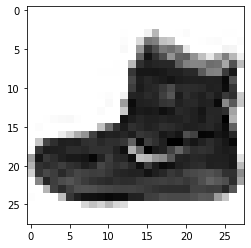

In [29]:
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()
plt.imshow(train_input[0], cmap='gray_r')
plt.show()

이 샘플을 `conv_acti` 모델에 주입하여 `Conv2D` 층이 생성하는 특성 맵을 출력해 보겠습니다. 참고로 `predict()` 메서드는 입력의 첫 번째 차원을 배치 차원으로 여깁니다. 샘플 하나를 전달할 때도 첫 번째 차원을 유지해야 합니다. 슬라이싱 연산자를 사용하여 샘플을 선택해야 하는 이유입니다. 코드로 구현해 보겠습니다.

In [30]:
# 이전 챕터에서 수행했던 전처리 작업과 같습니다.
inputs = train_input[0:1].reshape(-1, 28, 28, 1) / 255.0
feature_maps = conv_acti.predict(inputs)
print(feature_maps.shape)

(1, 28, 28, 32)


세임 패딩과 필터 32개를 사용한 합성곱 층의 출력이므로 (28, 28, 32)이며 첫 번째 차원은 배치 차원 1입니다. 한 샘플만 입력했으므로 1입니다.

특성 맵을 그려 보겠습니다.

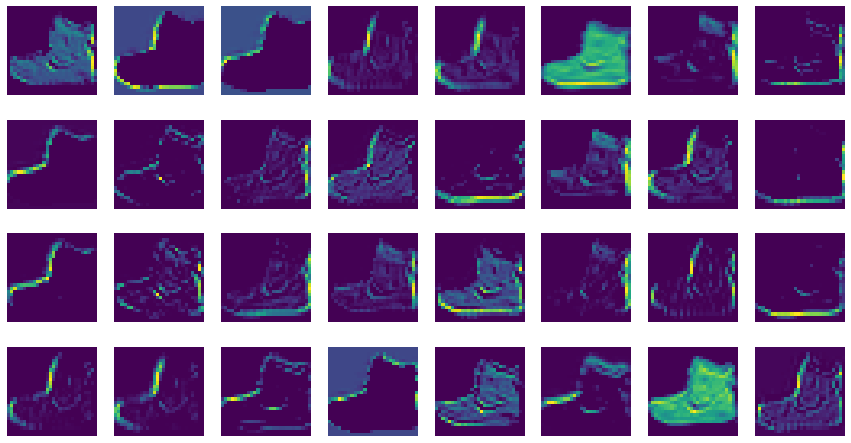

In [31]:
fig, axs = plt.subplots(4, 8, figsize=(15, 8))
for i in range(4):
    for j in range(8):
        axs[i, j].imshow(feature_maps[0, :, :, i*8 + j])
        axs[i, j].axis('off')
plt.show()

필터 32개로 인해 입력 이미지에서 강하게 활성화된 부분을 나타내는 특성 맵입니다. 위에서 가중치를 시각화한 이미지에서 밝은 색과 어두운 색이 구분되는 것을 확인할 수 있었습니다. 이런 부분과 일치되도록 위 특성맵에서도 밝은 색과 어두운 색이 나타납니다.

두 번째 합성곱 층이 생성한 특성 맵도 같은 방식으로 확인해 보겠습니다. `model` 인스턴스의 입력과 두 번째 합성곱 층인 `model.layers[2]`의 출력을 연결한 모델을 생성하고, 첫 번째 샘플을 이 모델의 `predict()` 메서드에 전달하겠습니다.

In [32]:
conv2_acti = keras.Model(model.input, model.layers[2].output)
inputs = train_input[0:1].reshape(-1, 28, 28, 1) / 255.0
feature_maps = conv2_acti.predict(inputs)

특성 맵의 크기를 확인해 보겠습니다.

In [33]:
print(feature_maps.shape)

(1, 14, 14, 64)


처음 풀링 층에서 가로세로 크기가 절반으로 줄었고, 두 번째 합성곱 층의 필터 개수는 64개입니다. 따라서 특성 맵의 크기는 (14, 14, 64)입니다.

특성 맵을 시각화해 보겠습니다.

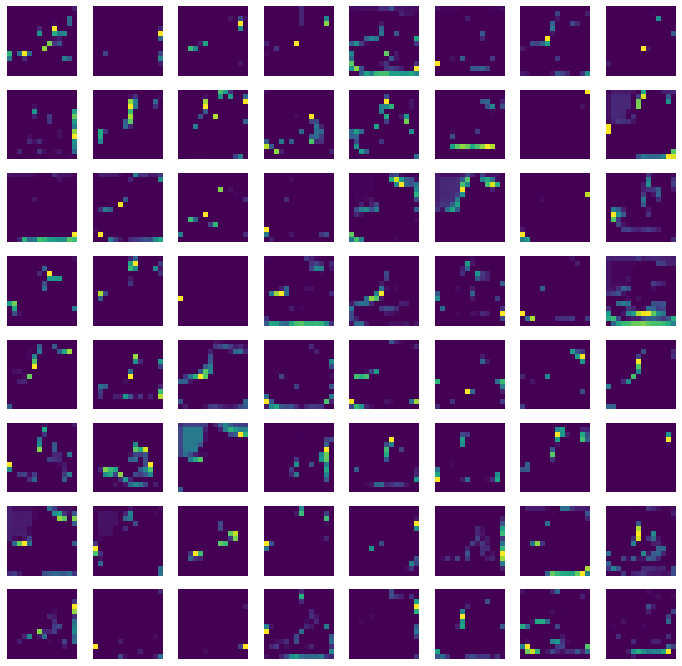

In [34]:
fig, axs = plt.subplots(8, 8, figsize=(12, 12))
for i in range(8):
    for j in range(8):
        axs[i, j].imshow(feature_maps[0, :, :, i*8 + j])
        axs[i, j].axis('off')
plt.show()

처음 특성 맵과 달리 규칙성이 없습니다. 두 번째 합성곱 층의 필터 크기는 (3, 3, 32)이고, 두 번째 합성곱 층의 첫 번째 필터가 앞서 출력한 특성 맵 32개와 곱해져 두 번째 합성곱 층의 첫 번째 특성 맵이 됐습니다. 이렇게 계산된 출력은 위 특성 맵에서 어떤 부위를 감지하는지 해석하기 어렵습니다. 합성곱 층을 많이 쌓을수록 더 해석하기 어려워집니다. 합성곱 신경망의 앞부분에 있는 합성곱 층은 이미지의 시각적 정보를 감지하고, 뒤쪽에 있는 합성곱 층은 앞쪽에서 감지한 시각적 정보를 토대로 추상적인 정보를 학습하는 것입니다.